Phugoid Oscillations Module 2

In [95]:
import numpy as np
from matplotlib import pyplot
#%matplotlib inline
T=100.0
dt=0.02
N=int(T/dt+1)
print (N)

5001


In [96]:
t=np.linspace(0, T, num=N)

In [97]:
z0=100
b0=10
zt=100
g=9.81

In [98]:
u=np.array([z0, b0])
z=np.zeros(N)
z[0]=z0
print (u)
print (z.shape)



[100  10]
(5001,)


In [99]:
for n in range (1, N):
    rhs=np.array([u[1], g*(1-u[0]/zt)])
    u=u+dt*rhs
    z[n]=u[0]

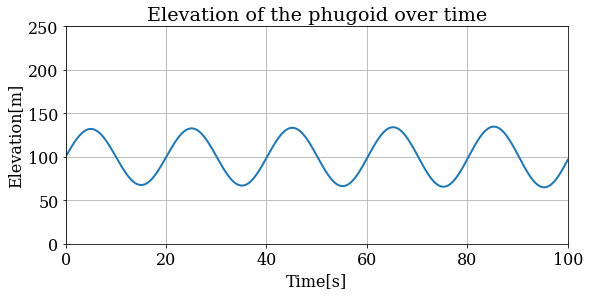

In [100]:
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=16

pyplot.figure(figsize=(9.0, 4.0))
pyplot.title('Elevation of the phugoid over time')
pyplot.xlabel('Time[s]')
pyplot.ylabel('Elevation[m]')
pyplot.xlim(t[0],t[-1])
pyplot.ylim(0, 250.0)
pyplot.grid()
pyplot.plot(t, z, color='C0', linestyle='-', linewidth=2);


In [101]:
z_exact = (b0 * (zt / g)**0.5 * np.sin((g / zt)**0.5 * t) +
           (z0 - zt) * np.cos((g / zt)**0.5 * t) + zt)

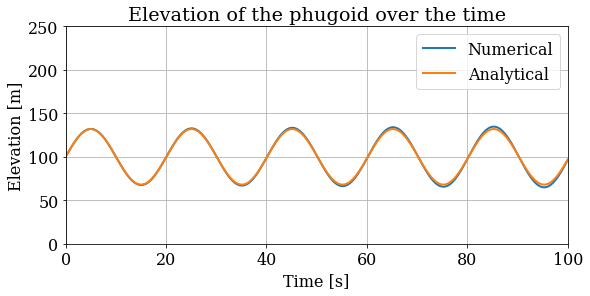

In [102]:
pyplot.figure(figsize=(9.0, 4.0))
pyplot.title('Elevation of the phugoid over the time')
pyplot.xlabel('Time [s]')
pyplot.ylabel('Elevation [m]')
pyplot.xlim(t[0], t[-1])
pyplot.ylim(0.0, 250.0) 
pyplot.grid()
pyplot.plot(t, z, label='Numerical',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(t, z_exact, label='Analytical',
            color='C1', linestyle='-', linewidth=2)
pyplot.legend();

In [147]:
dt_values=[0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]
z_values=[]
for dt in dt_values:
    N=int(T/dt)+1
    t=np.linspace(0.0, T, num=N)
    u=np.array([z0, b0])
    z=np.empty_like(t)
    z[0]=z0
    for n in range (1, N):
        rhs=np.array([u[1], g*(1-u[0]/zt)])
        u=u+dt*rhs
        z[n] = u[0]
    z_values.append(z)

In [148]:
print (len(z_values))
print (len(z_values[0]))
print (len(z_values[1]))
print (z_values)

6
1001
2001
[array([100.        , 101.        , 102.        , ...,  91.2989138 ,
        92.90712607,  94.5238741 ]), array([100.        , 100.5       , 101.        , ...,  94.75726869,
        95.39076488,  96.02554684]), array([100.        , 100.1       , 100.2       , ...,  96.60653005,
        96.71101708,  96.81553741]), array([100.        , 100.05      , 100.1       , ...,  96.79319077,
        96.84418536,  96.89518782]), array([100.        , 100.01      , 100.02      , ...,  96.93628874,
        96.94629199,  96.95629554]), array([100.        , 100.001     , 100.002     , ...,  96.96774265,
        96.96873863,  96.9697346 ])]


In [150]:
def l1_error(z, z_exact, dt):
    error=dt*(np.sum(np.abs(z-z_exact)))
    return error 
print (z_exact.shape)

(2001,)


In [151]:
error_values=[]

for z, dt in zip(z_values, dt_values):
    N=int(T/dt)+1
    t=np.linspace(0.0, T, num=N)
    z_exact=(b0*((zt/g)**0.5)*np.sin(((g/zt)**0.5)*t)+(z0-zt)*np.cos(((g/zt)**0.5)*t)+zt)
    error_values.append(l1_error(z, z_exact, dt))
   
    

In [152]:
print (z.shape)
print (z_exact.shape)
print (z.shape)
print (z.shape)

(1000001,)
(1000001,)
(1000001,)
(1000001,)


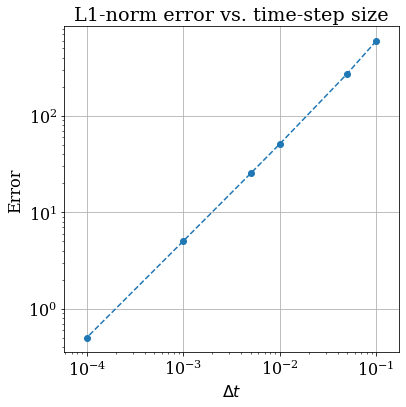

In [153]:
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm error vs. time-step size')  # set the title
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Error')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_values, error_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally
